## <h1>Lesson 2. Regression analysis: How Much Is Your Car Worth?</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/72/Kelley_Blue_Book_Vertical.JPG/152px-Kelley_Blue_Book_Vertical.JPG" style="height:200px;">
  
  <p>This exercise will use data collected from <a href="https://www.kbb.com/">Kelly Blue Book</a> for 2005 for used General Motors (GM) cars. The overall goal is to predict the suggested retail price of the car (<a href="http://ww2.amstat.org/publications/jse/jse_data_archive.htm">Kuiper (2008), JSE</a>).</p>

<p>The following features are available for this dataset:</p>
<ul>
<li>Price: Suggested retail price of the used 2005 GM car</li>
<li>Mileage: Car mileage</li>
<li>Cylinder: Number of cylinders in the engine</li>
<li>Doors: Number of doors</li>
<li>Cruise: Does it have cruise control</li>
<li>Sound: Does it have upgraded sound?</li>
<li>Leather: Does it have leather seats?</li>
<li>Make columns (indicator variables):
    <ul>
        <li>Buick</li>
        <li>Cadillac</li>
        <li>Chevy</li>
        <li>Pontiac</li>
        <li>Saab</li>
        <li>...</li>
    </ul>
</li>
<li>Body Type columns (indicator variables):
    <ul>
        <li>convertible</li>
        <li>coupe</li>
        <li>hatchback</li>
        <li>sedan</li>
        <li>...</li>
    </ul>
</li>
</ul>


In [1]:
import pandas as pd

cars = pd.read_csv('cars.csv')
cars

,Price,Mileage,Cylinder,Doors,Cruise,Sound,Leather,Buick,Cadillac,Chevy,Pontiac,Saab,Saturn,convertible,coupe,hatchback,sedan,wagon
0,22661.05,20105,6,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
1,21725.01,13457,6,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0
2,29142.71,31655,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
3,30731.94,22479,4,2,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,33358.77,17590,4,2,1,1,1,0,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,10813.34,266,4,4,1,0,1,0,0,1,0,0,0,0,0,1,0,0
800,9720.98,20836,4,4,1,1,0,0,0,1,0,0,0,0,0,1,0,0
801,9482.22,24842,4,4,1,0,0,0,0,1,0,0,0,0,0,0,1,0
802,9563.79,19273,4,4,1,1,0,0,0,1,0,0,0,0,0,0,1,0


In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 18 columns):
Price          804 non-null float64
Mileage        804 non-null int64
Cylinder       804 non-null int64
Doors          804 non-null int64
Cruise         804 non-null int64
Sound          804 non-null int64
Leather        804 non-null int64
Buick          804 non-null int64
Cadillac       804 non-null int64
Chevy          804 non-null int64
Pontiac        804 non-null int64
Saab           804 non-null int64
Saturn         804 non-null int64
convertible    804 non-null int64
coupe          804 non-null int64
hatchback      804 non-null int64
sedan          804 non-null int64
wagon          804 non-null int64
dtypes: float64(1), int64(17)
memory usage: 113.2 KB


<h3>Q.0 What is minimum priced car? The maximum priced? What is the lowest, highest, and average mileage? How many rows of data are there? How many columns? Do any of the columns have null values?</h3>

In [3]:
# Put the command (or commands) here to answer the questions above.
#TODO
from collections import OrderedDict, defaultdict
df=cars
list_cars=['Cadillac','Chevy', 'Pontiac','Saab','Saturn', 'Buick']

df_sortprice=df.sort_values(['Price'])
df_minpricecar=df_sortprice.iloc[0].to_dict()
for i in df_minpricecar:
    if df_minpricecar[i]==1 and i in list_cars:
        print ( "Minimum Priced cars - " ,i, df_minpricecar[i])
# df_minpricecar

Minimum Priced cars -  Chevy 1.0


In [4]:
df_maxpriced=df_sortprice.iloc[-1].to_dict()
for i in df_maxpriced:
    if df_maxpriced[i]==1 and i in list_cars:
        print ( "MaxPriced cars - " ,i, df_maxpriced[i])


MaxPriced cars -  Cadillac 1.0


In [5]:
#  Highest Mileage
df_mileageSort=df.sort_values(['Mileage'])
df_highestmileage=df_mileageSort.iloc[-1]
print ("Highest Mileage =",df_highestmileage[1])
#  Lowest Mileage
df_lowestmileage=df_mileageSort.iloc[0]
print ("lowest Mileage =",df_lowestmileage[1])
# Average Mileage
df_averagemileage=df_mileageSort["Mileage"].mean()
print("Average Mileage", int(df_averagemileage))

Highest Mileage = 50387.0
lowest Mileage = 266.0
Average Mileage 19831


In [6]:
# rows and columns of data
r, c=df.shape
print("rows ", r)
print("columns", c)

rows  804
columns 18


In [7]:
df.isnull().sum()
#  There are no null values in any of the column

Price          0
Mileage        0
Cylinder       0
Doors          0
Cruise         0
Sound          0
Leather        0
Buick          0
Cadillac       0
Chevy          0
Pontiac        0
Saab           0
Saturn         0
convertible    0
coupe          0
hatchback      0
sedan          0
wagon          0
dtype: int64

<h3>Q.1. Plot Price vs. Mileage. From the plot, does it seem like cars with more mileage are worth less?</h3>

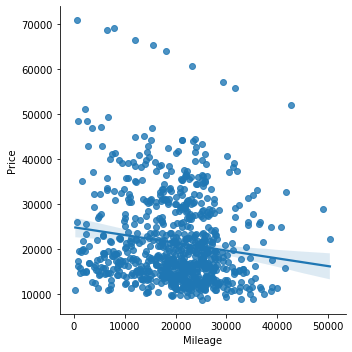

In [8]:
# Put the command (or commands) here that would give answer to the above question.
import seaborn as sns
sns.lmplot(x='Mileage',y='Price',data=cars,fit_reg=True)
# The direct linear plot shows its hard to predict values
# In the data most of the data points fall with in the price range of 20000 to 30000 its hard to predict the relation between the two
#  To determine the relation between the price and mileage it is better to use R sqr score with greater than 0.8 score for good fit of data
# Which is shown below

<h3>Q.2. Develop a simple linear regression model, relating price with mileage only. Show summary statistics for the model.</h3> 

Intercept : 24764.558991201993 slope : -0.17252050260202131
rsqr_value 0.02046344728556082


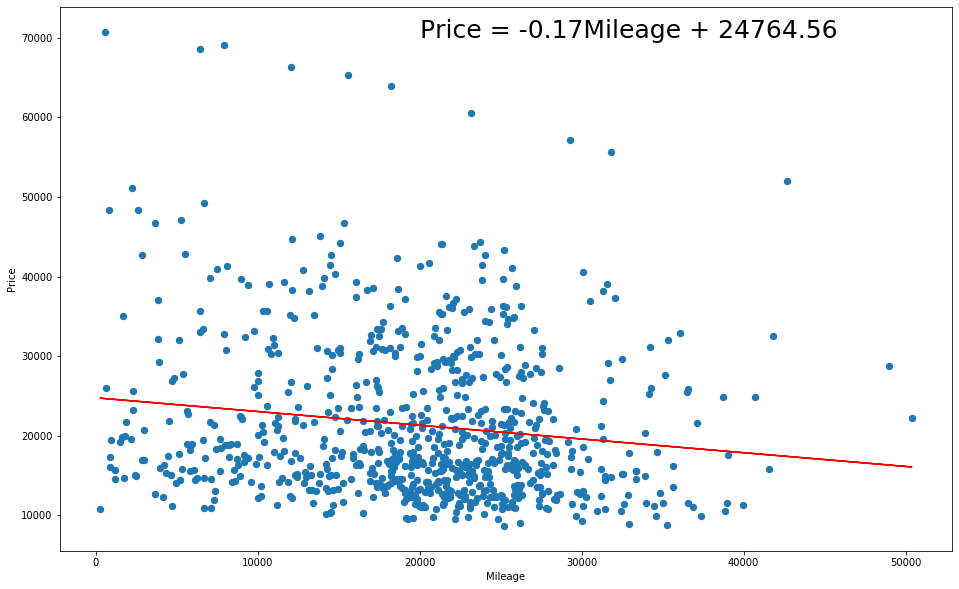

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from pandas import DataFrame, Series
import statsmodels.formula.api as sm
from sklearn import linear_model
import scipy, scipy.stats 
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Linear regression model:
miles_price_linreg = linear_model.LinearRegression()
# fit the model
cars_X=cars.loc[:, ['Mileage']]
cars_Y=cars.loc[:, ['Price']]
miles_price_linreg.fit(cars_X, cars_Y)
# plot the data points of cars data frame
cars.plot(kind='scatter', x='Mileage', y='Price', figsize=(16,10), s=40)
# Linear regression line 
cars_Yp=miles_price_linreg.predict(cars_X)
# plot the linear regression line
plt.plot(cars['Mileage'], cars_Yp, color='red')
# Extract the coefficients of the line
num_features = 1
num_targets=1
intercept, coef =miles_price_linreg.intercept_[num_targets-1], miles_price_linreg.coef_[num_features-1][num_targets-1]
intercept, coef
print("Intercept :", intercept, "slope :", coef)
# Plot the linear regression line in the form price=slope*mileage+intercept
text = 'Price = {:.2f}Mileage + {:.2f}'.format(coef, intercept)
plt.text(20000, 70000, text, fontsize=25)
# Show summary statistics for the model:
rsqr_value=miles_price_linreg.score(cars_X, cars_Y)
print('rsqr_value', rsqr_value)

<h3>Q.3. What happens to price when there is one more mile on the car?</h3>

In [11]:
# Command:
cars_xincreased=cars.loc[:, ['Mileage']]+1
miles_price_linreg.fit(cars_xincreased, cars_Y)
miles_price_linreg.score(cars_xincreased, cars_Y)
# There is no effect on price when there is one more mile on the car as the rsqr value does not change the data is not the right fit for the line. Its hard to predict the realtion of milegae and car

0.020463447285561043

# <h3>Q.4. What is the expected value of a car with 0 miles according to your model?</h3>

In [13]:
# Single command
zeromiles=cars_xincreased*0
zeromiles
zerofit=miles_price_linreg.fit(zeromiles, cars_Y)
num_features = 1
num_targets=1
intercept, coef =zerofit.intercept_[num_targets-1], zerofit.coef_[num_features-1][num_targets-1]
intercept, coef
print("Intercept :", intercept, "slope :", coef)
# In price=slope*mileage+intercept, when mileage is zero then price=intercept

Intercept : 21343.143756218902 slope : 0.0


<h3>Q.5. Plot residuals of the model vs. fitted values. Are there any problems that you see with the model?</h3>

Text(0.5, 1.0, 'Relation of residuals versus fitted model')

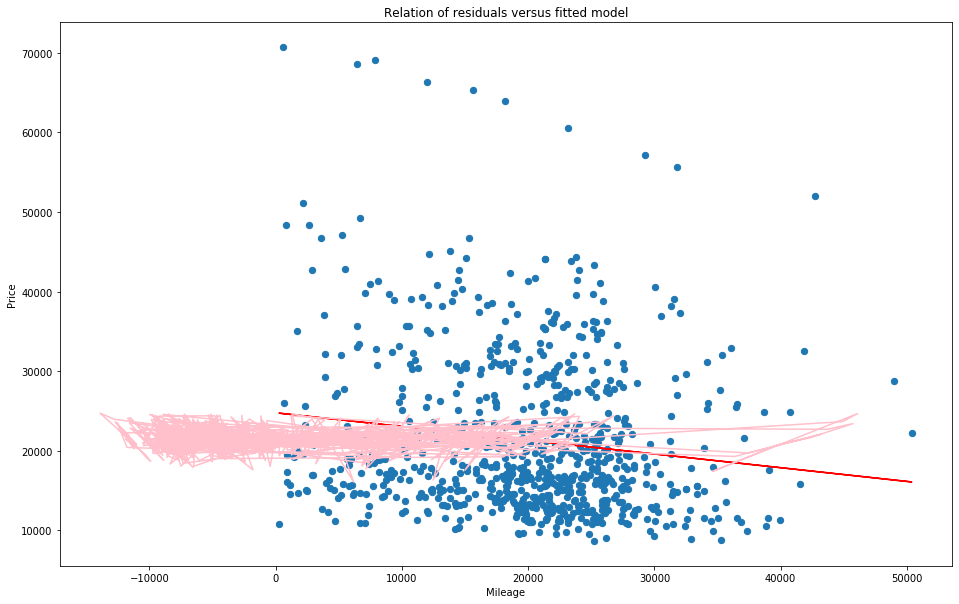

In [14]:
# Plot residuals
# residual=observed-predicted
residual=cars_Y-cars_Yp
residual
cars.plot(kind='scatter', x='Mileage', y='Price', figsize=(16,10), s=40)
plt.plot(cars['Mileage'], cars_Yp, color='red')
# plt.plot(cars['Mileage'], residual, color='red')
plt.plot(residual,cars_Yp,color='pink')
plt.title('Relation of residuals versus fitted model')
# Explain whether there are any problems (1-2 sentence)
# The red line is the fitted model and pink is the residual model the model does not fit the data(overfitted)

<h3>Q.6. Develop a model that predicts the Price from Mileage, Cylinder, Doors, Cruise, Sound, Leather data. Is this model more accurate - explain why (1-2 sentence). </h3>

In [16]:
# Commands:
features = ["Mileage", "Cylinder","Doors","Cruise","Sound","Leather"]
price = ["Price"]

X = cars[features]
y = cars[price]
# Fitting the model
reg = linear_model.LinearRegression()
regfit = reg.fit(X, y)
# r sqr value
rsqr=regfit.score(X,y)
print('rsqr score',rsqr)
# Explanation:
# 0.44 is also not a strong corelation and hence a poor fit for data

rsqr score 0.4456909297303393


<h3>Q.7. Are any of the features in the above model highly colinear to the point where they impact the model quality?</h3>

In [17]:
# Command(s):
columns=['Mileage', 'Cylinder','Doors','Cruise','Sound','Leather','Buick','Cadillac','Chevy','Pontiac','Saab','Saturn','convertible','coupe','hatchback','sedan','wagon']
X=cars[columns]
y=cars['Price']



In [19]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = linear_model.LinearRegression()  
regressor.fit(X_train, y_train)
# coeffiecients price=b0+b1x1+b2x2+....bnxn solving for coeffients
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)
# We can see that price is impacted with changes in different parameters
slope=regressor.intercept_


             Coefficient
Mileage        -0.182100
Cylinder     3683.585073
Doors       -2572.206355
Cruise        426.401475
Sound         416.270659
Leather       941.175413
Buick       -2701.389251
Cadillac     9095.185519
Chevy       -4601.101311
Pontiac     -5531.989173
Saab         7774.088118
Saturn      -4034.793901
convertible  6397.059665
coupe       -5110.956488
hatchback   -3273.197426
sedan       -1449.308649
wagon        3436.402898


In [21]:
import sklearn.metrics as metrics
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
r2=regressor.score(X_test,y_test)
print('rsqr',r2)
# root mean square error is high and r sqr value is low this model is not the right fit

Mean Absolute Error: 2029.5603482485128
Mean Squared Error: 7227257.325712189
Root Mean Squared Error: 2688.3558778019305
rsqr 0.9250847705956164


In [24]:
# parameters that increase the price
col=['Cylinder','Cruise','Sound','Leather','Cadillac','Saab','convertible','wagon']
y=cars['Price']
rsqrdict={}
for feature in col:
    X_train, X_test, y_train, y_test = train_test_split(cars[[feature]], y, test_size=0.2, random_state=0)
    regressor = linear_model.LinearRegression()
    regressor.fit(X_train, y_train)
    rsqr=regressor.score(X_test, y_test)
    rsqrdict[feature]=rsqr


rsqrdict

{'Cylinder': 0.2934110178642344,
 'Cruise': 0.16357911731112273,
 'Sound': 0.03665667149624097,
 'Leather': 0.021131454440901698,
 'Cadillac': 0.4796405680242851,
 'Saab': 0.12474582494987352,
 'convertible': 0.1994401337915297,
 'wagon': 0.0029685346795218504}

In [25]:
#  from the above rsqr model only Cadillac data has 47% good fit rest is the error.  The value is not hight, so its hard to predict the model quality with the listed features

<h3>Q.8. What is the expected price for the Chevy sedan described in variable 'chevy', shown below?</h3>

In [26]:

chevydata={'Mileage':30000, 'Cylinder':4, 'Doors':2, 'Cruise':1, 'Sound':1, 'Leather':1}
chevy = pd.Series(chevydata).to_frame()
# Commands that estimate the price of 'chevy' using the model with 6 predictors
miles_price_linreg = linear_model.LinearRegression()
# fit the model
cars_X=cars.loc[:, ['Mileage']]
cars_Y=cars.loc[:, ['Price']]
miles_price_linreg.fit(cars_X, cars_Y)
y_pred = miles_price_linreg.predict(chevy)
y_pred
print("expected price of chevy", y_pred[0])

expected price of chevy [19588.94391314]


<h3>Q.9. What is the expected price for the Chevy mentioned above if you include all features in the prediction? Can you comment on any problems you encounter when doing this prediction?</h3>

In [27]:
chevydataall={'Mileage':30000, 'Cylinder':4, 'Doors':2, 'Cruise':1, 'Sound':1, 'Leather':1, 'convertible':1, 'convertible':1,'hatchback':1, 'sedan':1,'wagon':1}
chevy = pd.Series(chevydataall).to_frame()
y_pred = miles_price_linreg.predict(chevy)
print("expected price of chevy", y_pred[0])
# The price of the car with all the features is going to be the same as a chevy car cannot have  convertible, sadan etc features at the same time 

expected price of chevy [19588.94391314]


<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

In [ ]:
# enter your response here
#  The data of the assignment was clean.
# Learnt error models and how to get the fit of the data with the error models 